In [1]:
# Copyright 2018 Anar Amirli
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/liJNKJNcenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Pitcn Segment visualisation

In this notebook, we visualize our segments and pitch index assignment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython import display
import matplotlib.lines as mlines

pd.options.display.max_columns = None

pd.set_option('compute.use_bottleneck', True)
pd.set_option('compute.use_numexpr', True)
from shapely.geometry import Point, Polygon
import geopandas


In [3]:
def plot_segment(ax, x1,y1,x2,y2,x3,y3,x4,y4):
    ax.add_line(mlines.Line2D((x1,x2), (y1, y2), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x2, x3), (y2, y3), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x3, x4), (y3, y4), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x4, x1), (y4, y1), color='orange', linewidth=2, zorder=1))
    
def plot_segment6(ax, x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6):
    ax.add_line(mlines.Line2D((x1,x2), (y1, y2), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x2, x3), (y2, y3), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x3, x4), (y3, y4), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x4, x5), (y4, y5), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x5, x6), (y5, y6), color='orange', linewidth=2, zorder=1))
    ax.add_line(mlines.Line2D((x6, x1), (y6, y1), color='orange', linewidth=2, zorder=1))

In [18]:
def pitch_index(x,y):
    
    segments = geopandas.GeoSeries({
        '1': Polygon([(0,0), (0,21), (27,15), (37,0)]),
        '2': Polygon([(0,47), (27, 53), (27,15), (0,21)]),
        '3': Polygon([(0,47), (0,68), (37,68), (27,53)]),
        '4': Polygon([(27,15), (78,15), (68,0), (37,0)]),
        '5': Polygon([(27, 15), (78, 15), (78, 53), (27, 53)]),
        '6': Polygon([(27,53), (78,53), (68,68), (37,68)]),
        '7': Polygon([(105,0), (105,21), (78,15), (68,0)]),
        '8': Polygon([(105,47), (78,53), (78,15), (105,21)]),
        '9': Polygon([(105,47), (105,68), (68,68), (78,53)])
    })
    
    point = Point(x, y)

    for i in range(len(segments)):
        if segments[i].contains(point)==True or segments[i].intersects(point)==True:
            return i+1

    return 0

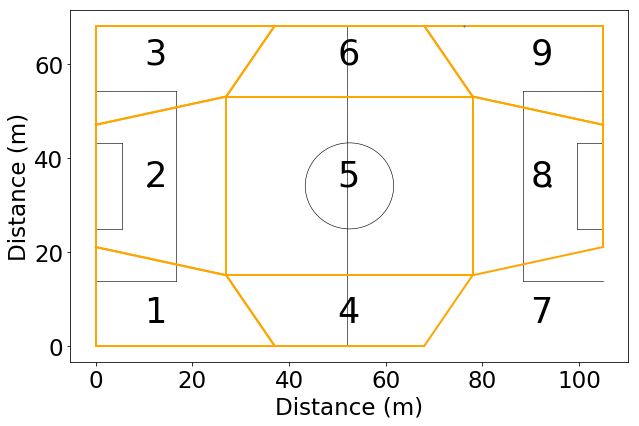

In [19]:
font = {'size'   : 23}
matplotlib.rc('font', **font)

width, height = 105, 68
plt.figure(figsize=(10, 10*height/width))

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')

size = 250
ax = plt.gca()
mid_circ = plt.Circle((52.5, 34), 9.15, color='black', fill=False, linewidth=0.6, zorder=1)
left_pen_circ = plt.Circle((11, 34), 0.3, color='black', fill=True, linewidth=0.6, zorder=1)
right_pen_circ = plt.Circle((94, 34), 0.3, color='black', fill=True, linewidth=0.6, zorder=1)
# middle line
ax.add_line(mlines.Line2D((52, 52), (0, 68), color='black', linewidth=0.6, zorder=1))

# circles
ax.add_artist(mid_circ)
ax.add_artist(left_pen_circ)
ax.add_artist(right_pen_circ)

# left part
ax.add_line(mlines.Line2D((0, 16.5), (13.84, 13.84), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((0, 16.5), (54.16, 54.16), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((16.5, 16.5), (13.84, 54.16), color='black', linewidth=0.6, zorder=1))

ax.add_line(mlines.Line2D((0, 5.5), (24.84, 24.84), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((0, 5.5), (43.16, 43.16), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((5.5, 5.5), (24.84, 43.16), color='black', linewidth=0.6, zorder=1))

# right part
ax.add_line(mlines.Line2D((88.5, 105), (13.84, 13.84), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((88.5, 105), (54.16, 54.16), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((88.5, 88.5), (13.84, 54.16), color='black', linewidth=0.6, zorder=1))

ax.add_line(mlines.Line2D((99.5, 105), (24.84, 24.84), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((99.5, 105), (43.16, 43.16), color='black', linewidth=0.6, zorder=1))
ax.add_line(mlines.Line2D((99.5, 99.5), (24.84, 43.16), color='black', linewidth=0.6, zorder=1))


# segments
plot_segment(ax,0,0,0,21,27,15,37,0)
plot_segment(ax,0,47,27,53,27,15,0,21)
plot_segment(ax,0,47,0,68,37,68,27,53)



plot_segment(ax,27,15,78,15,68,0,37,0)
plot_segment(ax,27,15,78,15,78,53,27,53)
plot_segment(ax,27,53,78,53,68,68,37,68)


# plot_segment(ax,105,0,105,21,78,15,68,0)
plot_segment(ax,105,47,78,53,78,15,105,21)
plot_segment(ax,105,47,105,68,68,68,78,53)




ax.text(10, 5, '1', fontsize=35)
ax.text(10, 34, '2', fontsize=35)
ax.text(10, 60, '3', fontsize=35)

ax.text(50, 5, '4', fontsize=35)
ax.text(50, 34, '5', fontsize=35)
ax.text(50, 60, '6', fontsize=35)

ax.text(90, 5, '7', fontsize=35)
ax.text(90, 34, '8', fontsize=35)
ax.text(90, 60, '9', fontsize=35)


plt.scatter(76.28, 68.05, label='Any point', s=1, zorder=2)


plt.show()

### Pitch Segment Assignment

In [20]:
point = [[43,32],[5,7],[27,15], [100,34],[105,0], [78,15], [100, 56], [33, 19]]

print("Poinst\t Segment")
print("----------------")

for i in point:
    segment = pitch_index(i[0], i[1])
    print('{x},{y}\t{s}'.format(x=i[0], y=i[1], s=segment))

Poinst	 Segment
----------------
43,32	5
5,7	1
27,15	1
100,34	8
105,0	7
78,15	4
100,56	9
33,19	5
